#Data Preparation-Iris Dataset

In [107]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names
iris.target_names
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()
df['target'] = iris.target
df.head()
df[df.target==1].head()
df[df.target==2].head()
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()
df[45:55]
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

__Sepal length vs Sepal Width (Setosa vs Versicolor)__

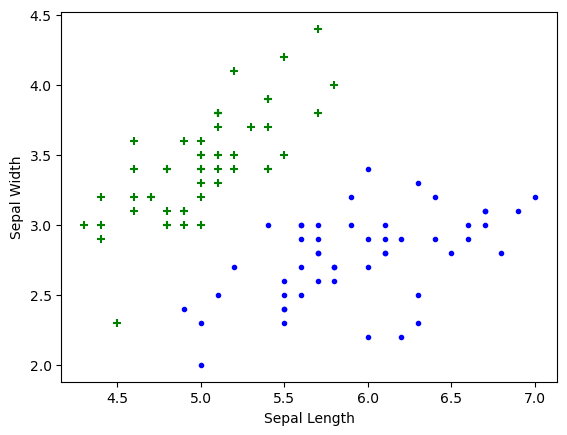

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

__Petal length vs Pepal Width (Setosa vs Versicolor)__

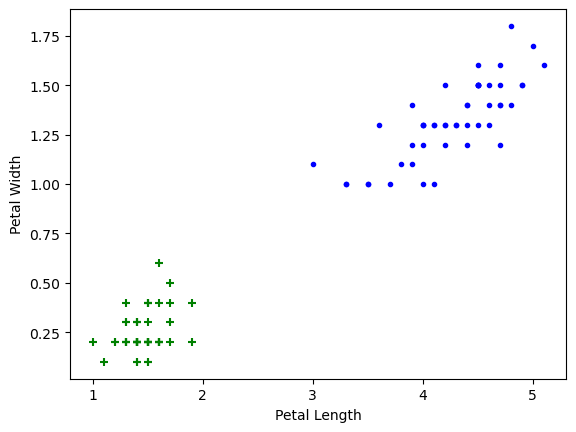

In [113]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

__Train Using KNN__

In [139]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                    test_size=0.2,random_state=0)
len(X_train)
len(X_test)

30

__#Create KNN Classifier__

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)

0.95

In [129]:
from sklearn.metrics import confusion_matrix
y_pred_test=knn.predict(X_test)
cm=confusion_matrix(y_test,y_pred_test)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual')

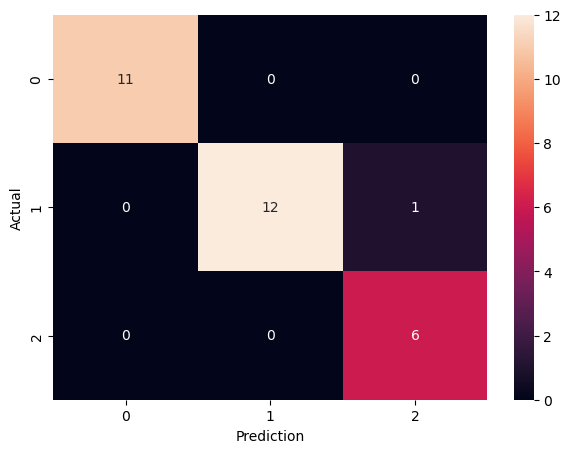

In [141]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

